In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from analysis import *
import simulation

In [2]:
#Testing Lennarts functions

In [3]:
#testFile = "TestSimulation.dat"
testFile = "figure3/figure3__100000_4_2_100_FirstRound_0.50_0.40_1000_1_4_StepWiseLinear_1_10.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.5
    alphaRich = 0.1
    wealthPoor = 1
    wealthRich = 4
    riskInRound = EveryRound
    typeOfRiskCurve = RiskCurve.StepWiseLinear
    
    lambda = 10

    heterogeneous = True

In [4]:
header = readHeader(filename = testFile)
header

{'nr_generations': 100000.0,
 'number_of_rounds': 4.0,
 'group_size': 2.0,
 'population_size': 100.0,
 'risk_in_round': 'FirstRound',
 'alpha_poor': 0.5,
 'alpha_rich': 0.4,
 'number_of_games': 1000.0,
 'wealth_poor': 1.0,
 'wealth_rich': 4.0,
 'type_of_risk_curve': 'StepWiseLinear',
 'heterogenous': 1.0,
 'lambda_value': 10.0}

In [5]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], rounds = int(header["number_of_rounds"]))[-9:]

In [6]:
x = np.sum(np.mean(ContributionArray, axis=0), axis=1)

In [7]:
startArray = np.empty((0,2), float)

In [8]:
np.vstack((startArray,x))

array([[0.10931522, 0.10518056]])

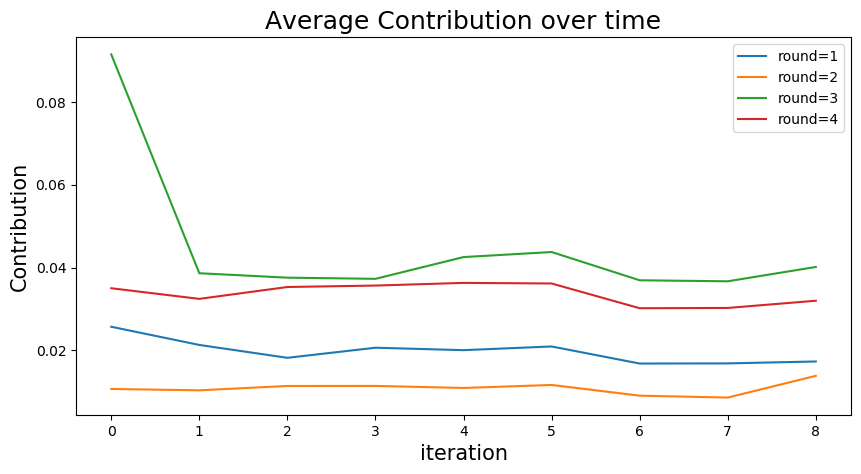

In [9]:
fig = plotContributionVsGeneration(ContributionArray,True)

In [10]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 0.189187,
 'AverageContributionPerRoundRich': array([0.056663, 0.049965, 0.037342, 0.020976]),
 'AverageContributionPerRoundPoor': array([0.138903, 0.040547, 0.022468, 0.011478])}

### Plotting figure 3

In [11]:
# Shared data
generations = 100000
numberOfGames = 1000
numberOfRounds = 4
groupSize = 2
popSize = 100

wealthPoor = 1
wealthRich = 4
typeOfRiskCurve = "StepWiseLinear"

globalLambdaValue = 10

heterogeneous = True
filename = "figure3/figure3_"

axis_values =  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#### Difference in data
1. Risk in Round
    - Every Round
    - First Round
    - Last Round
    - Random Round
2. Alpha Rich
3. Alpha Poor

Starting with Every Round and risk for rich alpha 1.0

In [20]:
def extractData(riskInRound, alphaPoor):
    """
    Result (contribution array): left side rich, right side poor
    """
    alphaRichArray = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    contributionArray = np.empty((0,2), float)
    for alphaRich in alphaRichArray:
        StringName = "%s_%d_%d_%d_%d_%s_%0.2f_%0.2f_%d_%d_%d_%s_%d_%0.2f.dat" % (filename, generations, numberOfRounds, groupSize, popSize, riskInRound, alphaPoor, alphaRich, numberOfGames, wealthPoor, wealthRich, typeOfRiskCurve, heterogeneous, globalLambdaValue)
        contributionAtTheEnd = readContributionFileToData(fileName = StringName, heterogeneous = True, rounds = 4)[-30000:]
        contributionArray = np.vstack((contributionArray, np.sum(np.mean(contributionAtTheEnd, axis=0), axis=1)))
    return contributionArray

In [21]:
EveryRound_05 = extractData("EveryRound", 0.5)
EveryRound_10 = extractData("EveryRound", 1.0)
FirstRound_05 = extractData("FirstRound", 0.5)
FirstRound_10 = extractData("FirstRound", 1.0)
LastRound_05 = extractData("LastRound", 0.5)
LastRound_10 = extractData("LastRound", 1.0)
RandomRound_05 = extractData("RandomRound", 0.5)
RandomRound_10 = extractData("RandomRound", 1.0)

In [22]:
def singlePlot(data):
    richData = data[:,0]/4
    poorData = data[:,1]
    fig = figure()
    _ = plt.plot(axis_values, richData, c='b', linewidth=1, marker='o', label="Rich")
    _ = plt.plot(axis_values, poorData, c='g', linewidth=1, marker='o', label="Poor")
    _ = plt.legend(frameon=False)
    return fig
    
data = np.array([[EveryRound_10,FirstRound_10,LastRound_10,RandomRound_10],[EveryRound_05,FirstRound_05,LastRound_05,RandomRound_05]])

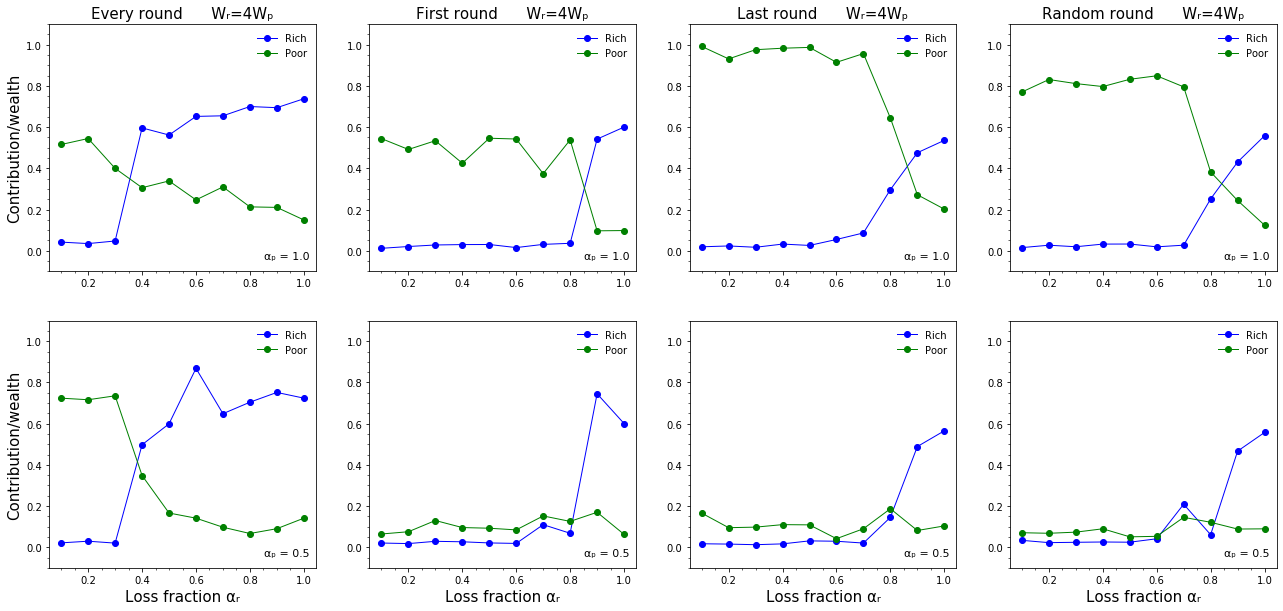

In [67]:
Column_title = ["Every round      Wᵣ=4W\u209A", "First round      Wᵣ=4W\u209A", "Last round      Wᵣ=4W\u209A", "Random round      Wᵣ=4W\u209A"]
y_axis_label = "Contribution/wealth"
x_axis_label = "Loss fraction \u03B1ᵣ"


fig, axs = plt.subplots(nrows=2, ncols=4, sharex=False, sharey=False,figsize=(22,10))
#fig.tight_layout()
for i in range(2):
    for j in range(4):
        if i == 0:
            axs[i,j].set_title(Column_title[j], fontsize=15)
        if j == 0:
            axs[i,j].set_ylabel(y_axis_label, fontsize=15)
        if i == 0:
            axs[i,j].text(1.02, -0.05, '\u03B1\u209A = 1.0', horizontalalignment='right',verticalalignment='bottom', fontsize=11)
        if i == 1:
            axs[i,j].text(1.02, -0.05, '\u03B1\u209A = 0.5', horizontalalignment='right',verticalalignment='bottom', fontsize=11)
            axs[i,j].set_xlabel(x_axis_label, fontsize=15)
        
        thisData = data[i,j]
        richData = thisData[:,0]/4
        poorData = thisData[:,1]
        
        axs[i,j].plot(axis_values, richData, c='b', linewidth=1, marker='o', label="Rich")
        axs[i,j].plot(axis_values, poorData, c='g', linewidth=1, marker='o', label="Poor")
        axs[i,j].set_ylim([-0.1,1.1])
        axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.05))
        axs[i,j].yaxis.set_minor_locator(MultipleLocator(0.05))
        axs[i,j].legend(frameon=False)
        
plt.savefig("figure3.png") 